In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# idee

NLP:
    - pos tagging per contare numero di aggettivi 
    - qualcosa per vedere se aggettivi sono positivi o negativi (direttamente sentiment analysis)?
    - rimuovere gli @ vs tenere solo i più frequenti 
    - rimuovere i link
    - pulire gli hashtag? 
    - word2vec distance per avere simili tweet assieme nello spazio vettoriale?
    - ridurre parole presenti? 
    - tfidf?
    
Processo:
    - clustering interno all'anno
    - clustering generale 
    - clustering con/senza sentiment meaning

In [2]:
data = pd.read_json("dataWithTags.json")
data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)
data

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,modded_text,@johnboehner,...,@trumpdoral,@dianejackson9,@toure,@floydmayweather,@10ajmccarron,@rspbscotland,@newyorkgop,@mattginellagc,@foxandfriends,@cnn
0,2009-05-04 18:54:25,202,1698308935,NaN,False,253,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,...,0,0,0,0,0,0,0,0,0,0
1,2009-05-05 01:00:10,3,1701461182,NaN,False,2,Twitter Web Client,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,...,0,0,0,0,0,0,0,0,0,0
2,2009-05-08 13:38:08,2,1737479987,NaN,False,3,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,...,0,0,0,0,0,0,0,0,0,0
3,2009-05-08 20:40:15,27,1741160716,NaN,False,8,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,...,0,0,0,0,0,0,0,0,0,0
4,2009-05-12 14:07:28,1950,1773561338,NaN,False,1421,Twitter Web Client,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,...,0,0,0,0,0,0,0,0,0,0
5,2009-05-12 19:21:55,13,1776419923,NaN,False,10,Twitter Web Client,"Miss USA Tara Conner will not be fired - ""I've...",miss usa tara conner will not be fired ive al...,0,...,0,0,0,0,0,0,0,0,0,0
6,2009-05-13 17:38:28,10,1786560616,NaN,False,11,Twitter Web Client,Listen to an interview with Donald Trump discu...,listen to an interview with donald trump discu...,0,...,0,0,0,0,0,0,0,0,0,0
7,2009-05-14 16:30:40,6,1796477499,NaN,False,3,Twitter Web Client,"""Strive for wholeness and keep your sense of w...",strive for wholeness and keep your sense of wo...,0,...,0,0,0,0,0,0,0,0,0,0
8,2009-05-15 14:13:13,2,1806258917,NaN,False,1,Twitter Web Client,"Enter the ""Think Like A Champion"" signed book ...",enter the think like a champion signed book an...,0,...,0,0,0,0,0,0,0,0,0,0
9,2009-05-16 22:22:45,5,1820624395,NaN,False,3,Twitter Web Client,"""When the achiever achieves, it's not a platea...",when the achiever achieves its not a plateau i...,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#exploit time
data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]

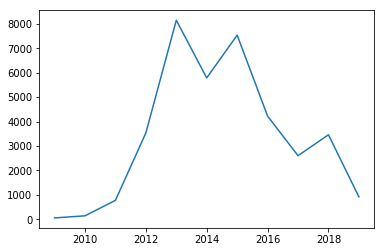

In [57]:
temp = data.groupby(["year"])["year"].count()
plt.plot(temp)

annuncio campagna elettorale giugno 2015

In [88]:
temp = pd.DataFrame({'count' : data.groupby( [ "year", "month"] ).size()}).reset_index()
temp

#plotta nel corso dei mesi il numero di tweet per anni, devi prendere i dati per ogni anno e farli di lunghezza uguale come array e poi plotti 

,year,month,count
0,2009,5,21
1,2009,6,11
2,2009,7,5
3,2009,8,7
4,2009,9,3
5,2009,10,4
6,2009,11,3
7,2009,12,2
8,2010,1,4
9,2010,2,4


ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

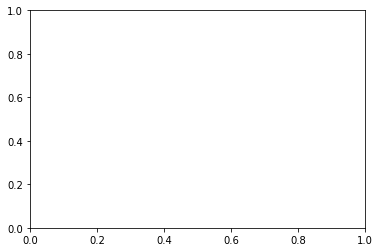

In [87]:
fig, ax = plt.subplots()

years = temp["year"].unique().tolist()
for y in years:
    plt.plot(kind='line', x='month', y='count', data=temp,label=y)
plt.legend(loc='best')
plt.show()


In [ ]:
fig, ax = plt.subplots()

ax = plt.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)

plt.plot(x = "month", y="count",data=temp)